In [ ]:
import numpy as np
import random as random
np.set_printoptions(threshold=np.inf)
MAX_TIME = 20.0
def life_step_1(X):
    """Game of life step using generator expressions"""
    nbrs_count = sum(np.roll(np.roll(X, i, 0), j, 1)
                     for i in (-1, 0, 1) for j in (-1, 0, 1)
                     if (i != 0 or j != 0))
    return (nbrs_count == 3) | (X & (nbrs_count == 2))

def life_step_2(X):
    """Game of life step using scipy tools"""
    from scipy.signal import convolve2d
    nbrs_count = convolve2d(X, np.ones((3, 3)), mode='same', boundary='wrap') - X
    return (nbrs_count == 3) | (X & (nbrs_count == 2))
    
def life_step_3(X,Y,T):
    """Noah and Daddy's update function"""
    count = np.zeros(X.shape)
    Xnew = np.zeros(X.shape)
    rows = X.shape[0]
    cols = X.shape[1]
    indices = [ (-1,-1), (-1,0), (-1,1), (0,-1), (0,1), (1,-1), (1,0), (1,1) ]
    for r in range(len(X)):
      for c in range(len(X[r])):
        n = 0
        if (X[r,c]):
          T[r,c] = T[r,c] + 1.0
        for pair in indices:
          ro = r+pair[0]
          co = c+pair[1]
          if (ro >= 0 and co >= 0 and ro < rows and co < cols and X[ro,co]):
            n = n + 1
            # print((r,c,X[r][c]),n)
          count[r,c] = n

    #print(T[nonzero(T)])

    for r in range(len(X)):
      for c in range(len(X[r])):
        u = np.random.uniform(0,1)
        # X[r,c] = count[r,c] == 3 or (X[r,c] and count[r,c] == 2)
        Xnew[r,c] = (X[r,c] or (count[r,c] >= 3 and u < 0.25) or (count[r,c] >= 1 and u < 0.001) or (u < 0.00001)) and count[r,c] < 9 and not Y[r,c] and (T[r,c] < MAX_TIME)
        Y[r,c] = Y[r,c] or ((not Xnew[r,c]) and X[r,c])
        X[r,c] = Xnew[r,c]

    return (X,Y,T)

life_step = life_step_3

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
#!pip install JSAnimation

In [ ]:
# JSAnimation import available at https://github.com/jakevdp/JSAnimation
#from JSAnimation.IPython_display import display_animation, anim_to_html
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def life_animation(X, dpi=10, frames=10, interval=300, mode='loop'):
    """Produce a Game of Life Animation
    
    Parameters
    ----------
    X : array_like
        a two-dimensional numpy array showing the game board
    dpi : integer
        the number of dots per inch in the resulting animation.
        This controls the size of the game board on the screen
    frames : integer
        The number of frames to compute for the animation
    interval : float
        The time interval (in milliseconds) between frames
    mode : string
        The default mode of the animation.  Options are ['loop'|'once'|'reflect']
    """
    X = np.asarray(X)
    assert X.ndim == 2
    T = np.zeros_like(X)
    T = T.astype(float)
    X = X.astype(bool)
    Y = np.zeros_like(X)
    
    X_blank = np.zeros_like(X)
    figsize = (X.shape[1] * 1. / dpi, X.shape[0] * 1. / dpi)

    my_cmap = plt.cm.Reds
    my_cmap.set_under('green')
    my_cmap.set_over('black')

    fig = plt.figure(figsize=figsize, dpi=dpi)
    fig.set_size_inches(18.5, 10.5)
    ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
    im = ax.imshow(T, cmap=my_cmap, interpolation='bilinear') # plt.cm.binary
    im.set_clim(-0.05, 1)  # Make background gray
    plt.colorbar(im)

    # initialization function: plot the background of each frame
    def init():
        #im.set_data(X_blank)
        im.set_data(np.zeros_like(T))
        return (im,)

    # animation function.  This is called sequentially
    def animate(i):
        im.set_data((animate.T/(MAX_TIME-5.0))*X + (1-X)*-1.0 + Y*3.0)
        (animate.X,animate.Y,animate.T) = life_step(animate.X,animate.Y,animate.T)
        return (im,)
    animate.X = X
    animate.Y = Y
    animate.T = T

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=frames, interval=interval)
    
    #print anim_to_html(anim)
    #return display_animation(anim, default_mode=mode)
    return HTML(anim.to_html5_video())

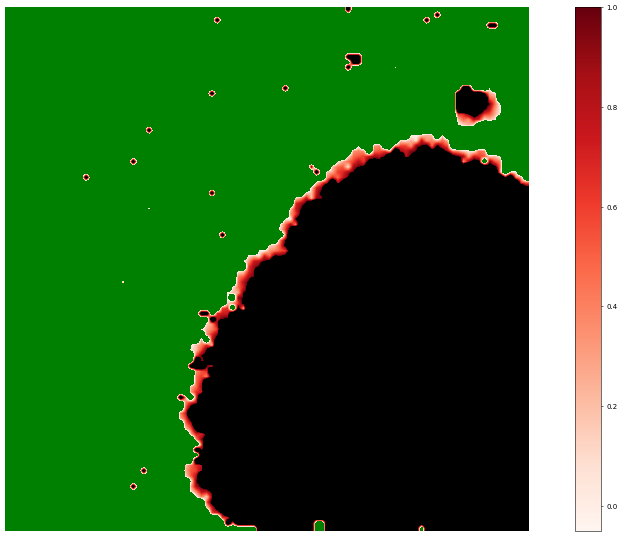

In [ ]:
# http://jakevdp.github.io/blog/2013/08/07/conways-game-of-life/
np.random.seed(0)
#X = np.zeros((30, 40), dtype=bool)
X = np.zeros((100, 100))
#X[1:4, 1:4] = [[0, 0, 1],
#               [1, 0, 1],
#               [0, 1, 1]]
#X[48:51, 48:51] = [[0, 1, 1],
#                   [1, 1, 0],
#                   [0, 1, 0]]
#X[48:51, 48:55] = [[0, 1, 0, 0, 0, 0, 0],
#                   [0, 0, 0, 1, 0, 0, 0],
#                   [1, 1, 0, 0, 1, 1, 1]]
#X[49:50,20:80] = 1
#X = [[0, 0, 0, 0, 0],
#     [0, 0, 1, 0, 0],
#     [0, 0, 1, 0, 0],
#     [0, 0, 1, 0, 0],
#     [0, 0, 0, 0, 0]]
X = np.array(X)
#X.shape
#r = np.random.random((10, 20))
#X[10:20, 10:30] = (r > 0.75)
life_animation(X, dpi=50, frames=400, mode='once', interval=100)

In [ ]:
#!pip uninstall JSAnimation
#!pip uninstall matplotlib -y

In [ ]:
#!pip install matplotlib==1.3.0
#pip install JSAnimation

In [ ]:
#pip install matplotlib